<a href="https://colab.research.google.com/github/majavk/UCI-ML-Breast-Cancer-Wisconsin/blob/main/UCI_ML_Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer NN Classification

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

    W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
    O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
    W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/udemy_tensorflow/1st_lecture/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')
df = raw_data.copy()

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,...,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319,1
482,13.47,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.05266,0.1779,0.06639,...,18.32,94.94,660.2,0.1393,0.24990,0.18480,0.13350,0.3227,0.09326,1
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.033460,0.02877,0.1573,0.05703,...,20.54,102.30,777.5,0.1218,0.15500,0.12200,0.07971,0.2525,0.06827,1
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.03070,0.1737,0.06440,...,29.46,73.68,402.8,0.1515,0.10260,0.11810,0.06736,0.2883,0.07748,1
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.01896,0.1517,0.05835,...,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,1


In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#features and target stored in munpy array
X = df.iloc[:,:-1].values
y = df['benign_0__mal_1'].values

In [ ]:
#splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=404)

In [ ]:
np.mean(y), np.mean(1-y)

(0.6274165202108963, 0.37258347978910367)

We can see that 62.7% of the patients are with malign breast cancer, while 37.3%are with benign breats cancer.


##Baseline model - Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rf_model.predict_proba(X_test)

array([[0.03 , 0.97 ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.01 , 0.99 ],
       [0.16 , 0.84 ],
       [0.895, 0.105],
       [0.43 , 0.57 ],
       [0.   , 1.   ],
       [0.355, 0.645],
       [0.965, 0.035],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.02 , 0.98 ],
       [0.025, 0.975],
       [0.995, 0.005],
       [0.075, 0.925],
       [0.95 , 0.05 ],
       [0.97 , 0.03 ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.02 , 0.98 ],
       [0.12 , 0.88 ],
       [0.02 , 0.98 ],
       [0.28 , 0.72 ],
       [0.295, 0.705],
       [0.01 , 0.99 ],
       [0.005, 0.995],
       [0.015, 0.985],
       [0.88 , 0.12 ],
       [0.02 , 0.98 ],
       [0.01 , 0.99 ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.03 , 0.97 ],
       [0.   , 1.   ],
       [0.31 , 0.69 ],
       [0.095, 0.905],
       [0.765, 0.235],
       [0.99 , 0.01 ],
       [0.0

In [ ]:
#making predictions on the test set and the scores (percent of the trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

print(f'accuracy is {accuracy_score(y_test,y_pred_class_rf):.3f}')
print(f'accuracy is {roc_auc_score(y_test,y_pred_proba_rf[:,1]):.3f}')

accuracy is 0.965
accuracy is 0.995


In [ ]:
roc_curve(y_test, y_pred_proba_rf[:,1])

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01818182,
        0.01818182, 0.03636364, 0.03636364, 0.05454545, 0.05454545,
        0.23636364, 0.27272727, 0.4       , 0.43636364, 0.54545455,
        0.6       , 0.67272727, 1.        ]),
 array([0.        , 0.32954545, 0.44318182, 0.53409091, 0.60227273,
        0.61363636, 0.68181818, 0.70454545, 0.72727273, 0.76136364,
        0.78409091, 0.79545455, 0.81818182, 0.86363636, 0.86363636,
        0.89772727, 0.89772727, 0.96590909, 0.96590909, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([2.   , 1.   , 0.995, 0.985, 0.98 , 0.975, 0.97 , 0.955, 0.95 ,
        0.915, 0.905, 0.885, 0.88 , 0.77 , 0.755, 0.71 , 0.705, 0.625,
        0.585, 0.465, 0.165, 0.16 , 0.065, 0.06 , 0.015, 0.01 , 0.005,
        0.   ])

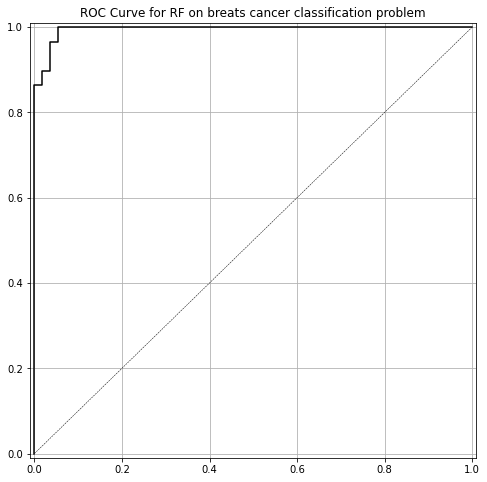

In [ ]:
def plot_roc(y_test, y_pred, model_name):
  fpr, tpr, thr = roc_curve(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(8,8))
  ax.plot(fpr, tpr, 'k-')
  ax.plot([0,1], [0,1], 'k--', linewidth=.5) #roc curve for random model
  ax.grid(True)
  ax.set(title=f'ROC Curve for {model_name} on breats cancer classification problem',
         xlim=[-0.01, 1.01], ylim=[-0.01,1.01])
  
plot_roc(y_test, y_pred_proba_rf[:,1], 'RF')



##Neural Network with 2 hidden layers

In [ ]:
# the data should be normalized
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
#Define the model
#Input size is 30-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# final layer has 1 output node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(30, input_shape=(30,), activation='relu'))
model_1.add(Dense(15, activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 30)                930       
                                                                 
 dense_27 (Dense)            (None, 15)                465       
                                                                 
 dense_28 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model (fit)
# compile the model with Optimizer, Loss function and Metrics
# Roc-Auc curve is not available in Keras as an off the shelf metric yet.

model_1.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
run_hist_1 = model_1.fit(x=X_train_norm, y=y_train, validation_data=(X_test_norm, y_test), epochs=600)
#the fit function returns the run history.
# it is very convenient, as it contains information about the model fit, iterations etc.

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6811 - accuracy: 0.6455 - val_loss: 0.6606 - val_accuracy: 0.6783
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.7653 - val_loss: 0.6329 - val_accuracy: 0.8182
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6101 - accuracy: 0.8427 - val_loss: 0.6058 - val_accuracy: 0.8112
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5756 - accuracy: 0.8357 - val_loss: 0.5722 - val_accuracy: 0.8392
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5402 - accuracy: 0.8826 - val_loss: 0.5420 - val_accuracy: 0.8322
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5038 - accuracy: 0.8803 - val_loss: 0.5068 - val_accuracy: 0.8462
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4667 - accuracy: 0.8897 - val_loss: 0.4776 - val_accuracy: 0.8322
Epoch 8/600

In [ ]:
#y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)
y_pred_class_nn_1 = (model_1.predict(X_test_norm)>0.5).astype('int32')


5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred_prob_nn_1[:10]

array([[1.0000000e+00],
       [1.0000000e+00],
       [5.2043175e-11],
       [3.3940961e-09],
       [1.5187565e-16],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0888989e-07],
       [9.9995232e-01],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

accuracy is 0.958
roc-auc is 0.988


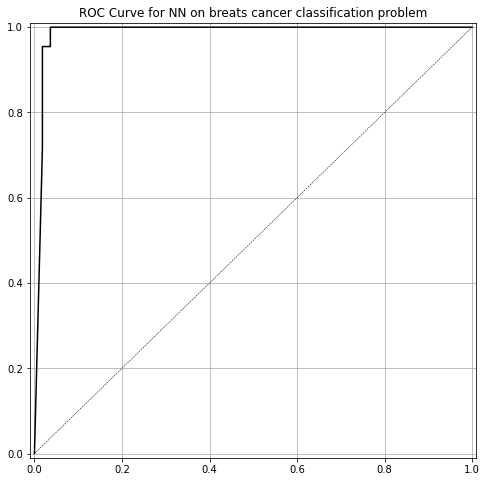

In [ ]:
# model performance and roc curve

print(f'accuracy is {accuracy_score(y_test,y_pred_class_nn_1):.3f}')
print(f'roc-auc is {roc_auc_score(y_test,y_pred_prob_nn_1):.3f}')

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

####History object

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

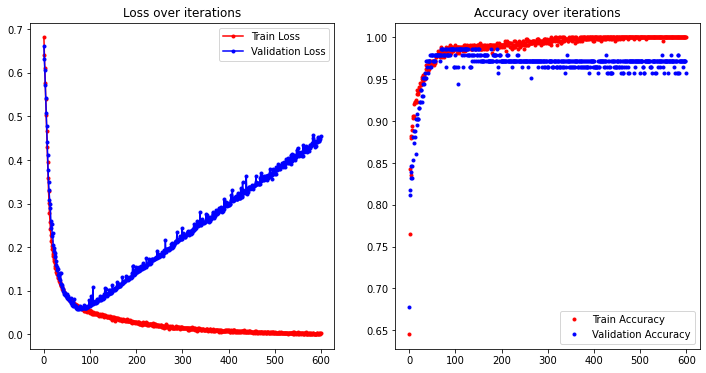

In [ ]:
# plotting of the training and validation loss over the different epochs

n = len(run_hist_1.history['loss'])

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(range(n), (run_hist_1.history['loss']), 'r', marker='.', label='Train Loss')
ax.plot(range(n), (run_hist_1.history['val_loss']), 'b', marker='.', label='Validation Loss')
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_1.history['accuracy']), 'r.', label='Train Accuracy')
ax.plot(range(n), (run_hist_1.history['val_accuracy']), 'b.', label='Validation Accuracy')
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')



##NN with Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_2 = Sequential()
model_2.add(Dense(30, input_shape=(30,), activation='relu'))
model_2.add(Dense(15, activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model_2.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
run_hist_2 = model_2.fit(x=X_train_norm, 
                         y=y_train, 
                         validation_data=(X_test_norm, y_test), 
                         callbacks=[early_stop], 
                         epochs=600)

Text(0.5, 1.0, 'Accuracy over iterations')

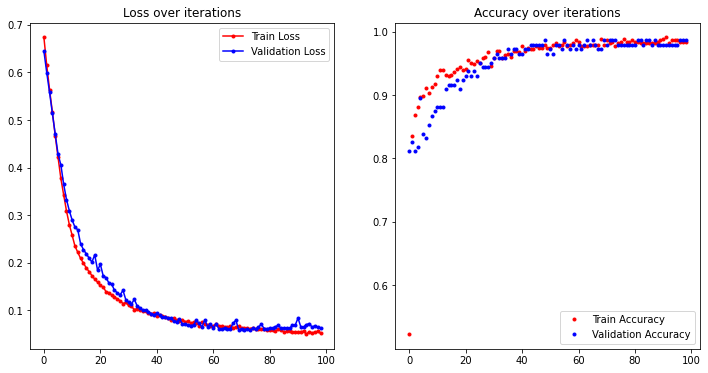

In [ ]:
n = len(run_hist_2.history['loss'])

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(range(n), (run_hist_2.history['loss']), 'r', marker='.', label='Train Loss')
ax.plot(range(n), (run_hist_2.history['val_loss']), 'b', marker='.', label='Validation Loss')
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history['accuracy']), 'r.', label='Train Accuracy')
ax.plot(range(n), (run_hist_2.history['val_accuracy']), 'b.', label='Validation Accuracy')
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [ ]:
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = (model_2.predict(X_test_norm)>0.5).astype('int32')


5/5 [==============================] - 0s 3ms/step


accuracy is 0.986
roc-auc is 0.996


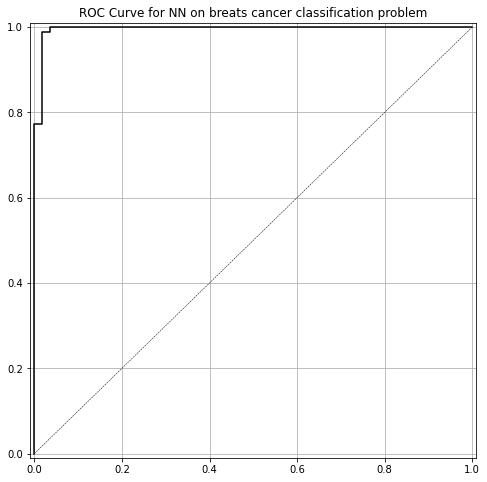

In [ ]:
print(f'accuracy is {accuracy_score(y_test,y_pred_class_nn_2):.3f}')
print(f'roc-auc is {roc_auc_score(y_test,y_pred_prob_nn_2):.3f}')

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

##NN with the dropout layer and Early Stopping





In [ ]:
model_3 = Sequential()
model_3.add(Dense(units=30,activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(units=15,activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(units=1,activation='sigmoid'))
#model_3.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#model_3.summary()

In [ ]:
early_stop_3 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model_3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
run_hist_3 = model_3.fit(x=X_train_norm, 
                         y=y_train, 
                         validation_data=(X_test_norm, y_test), 
                         callbacks=[early_stop_3], 
                         epochs=600)

Text(0.5, 1.0, 'Accuracy over iterations')

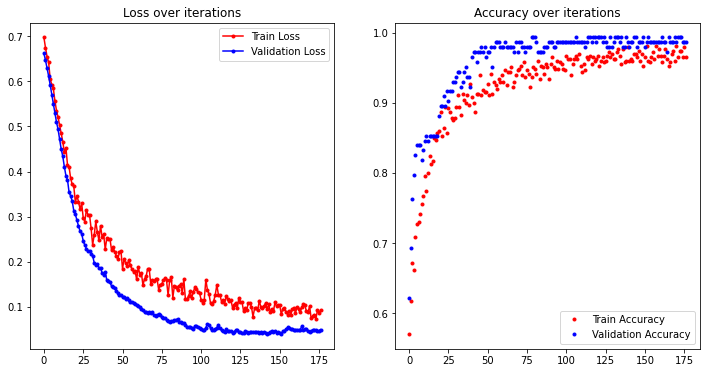

In [ ]:
n = len(run_hist_3.history['loss'])

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)

ax.plot(range(n), (run_hist_3.history['loss']), 'r', marker='.', label='Train Loss')
ax.plot(range(n), (run_hist_3.history['val_loss']), 'b', marker='.', label='Validation Loss')
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_3.history['accuracy']), 'r.', label='Train Accuracy')
ax.plot(range(n), (run_hist_3.history['val_accuracy']), 'b.', label='Validation Accuracy')
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [ ]:
y_pred_prob_nn_3 = model_3.predict(X_test_norm)
y_pred_class_nn_3 = (model_3.predict(X_test_norm)>0.5).astype('int32')

5/5 [==============================] - 0s 2ms/step


accuracy is 0.986
roc-auc is 0.998


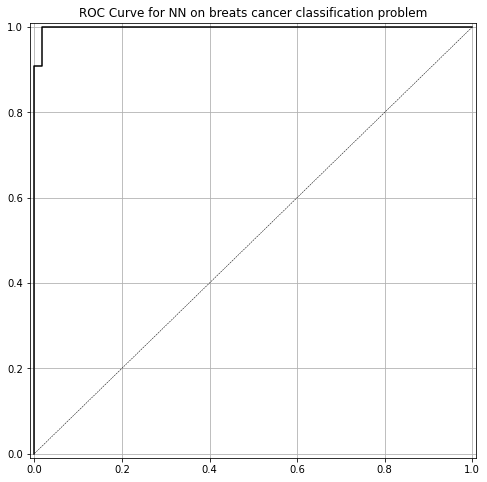

In [ ]:
print(f'accuracy is {accuracy_score(y_test,y_pred_class_nn_3):.3f}')
print(f'roc-auc is {roc_auc_score(y_test,y_pred_prob_nn_3):.3f}')

plot_roc(y_test, y_pred_prob_nn_3, 'NN')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test,y_pred_class_nn_3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
cm = confusion_matrix(y_test,y_pred_class_nn_3)

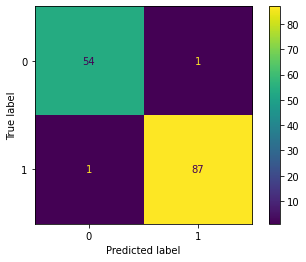

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_model.classes_)
disp.plot()
plt.show()